# *AIML CA2 PART A: TIME SERIES*

Project Statement - Using the Energy Consumption Dataset to train time series models and forecast 
the gas consumption, electricity consumption and water consumption in the 
future

From the project statement, we understand that we ae going to create a model which forcasts different features in the future. As multiple variables are to be forecasted, this will be under a Multivariate Time Series analysis.

For Multivariate Time Series forecasting, one of the most commonly methods used is **Vector Auto Regression (VAR)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Energy Consumption Dataset.csv', index_col=0)

In [3]:
data.head()

,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
DATE,,,
1/1/1990,18.0,725.1,548.8
1/2/1990,15.8,706.7,640.7
1/3/1990,17.3,624.5,511.1
1/4/1990,18.9,574.7,515.3
1/5/1990,22.0,553.2,488.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 1/1/1990 to 1/1/2023
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gas Consumption (tons)         397 non-null    float64
 1   Electricity Consumption (MWh)  397 non-null    float64
 2   Water Consumption (tons)       397 non-null    float64
dtypes: float64(3)
memory usage: 12.4+ KB


In [5]:
data.index = pd.to_datetime(data.index, dayfirst=True)

In [6]:
data.head()

,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
DATE,,,
1990-01-01,18.0,725.1,548.8
1990-02-01,15.8,706.7,640.7
1990-03-01,17.3,624.5,511.1
1990-04-01,18.9,574.7,515.3
1990-05-01,22.0,553.2,488.4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1990-01-01 to 2023-01-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gas Consumption (tons)         397 non-null    float64
 1   Electricity Consumption (MWh)  397 non-null    float64
 2   Water Consumption (tons)       397 non-null    float64
dtypes: float64(3)
memory usage: 12.4 KB


In [8]:
data.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

## Checking Stationarity

In order to check for stationarity, we can do a Visual test or a Statistical test.

To Visually test for stationarity, we should look out for 
- Constant Mean : the value of the first half of the time series should be similar to that of the second half
- Constant Variance : the amplitude of the first half of the time series should be similar to that of the second half
- Covariance is independent of time : the cycle length of the first half of the time series should be similar to that of the second half

Below is an example of visually non-stationary and visually stationary graphs

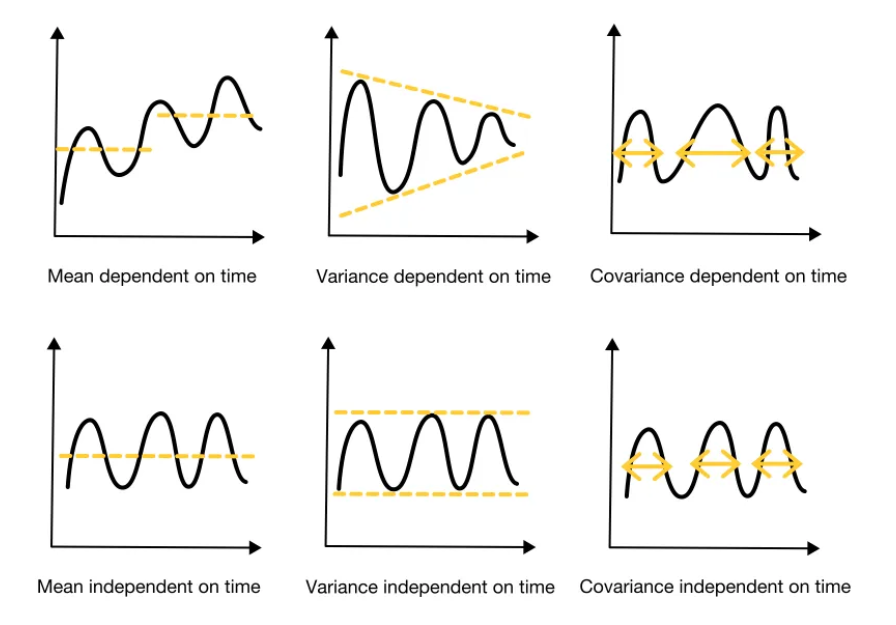

### Visual test to check stationarity

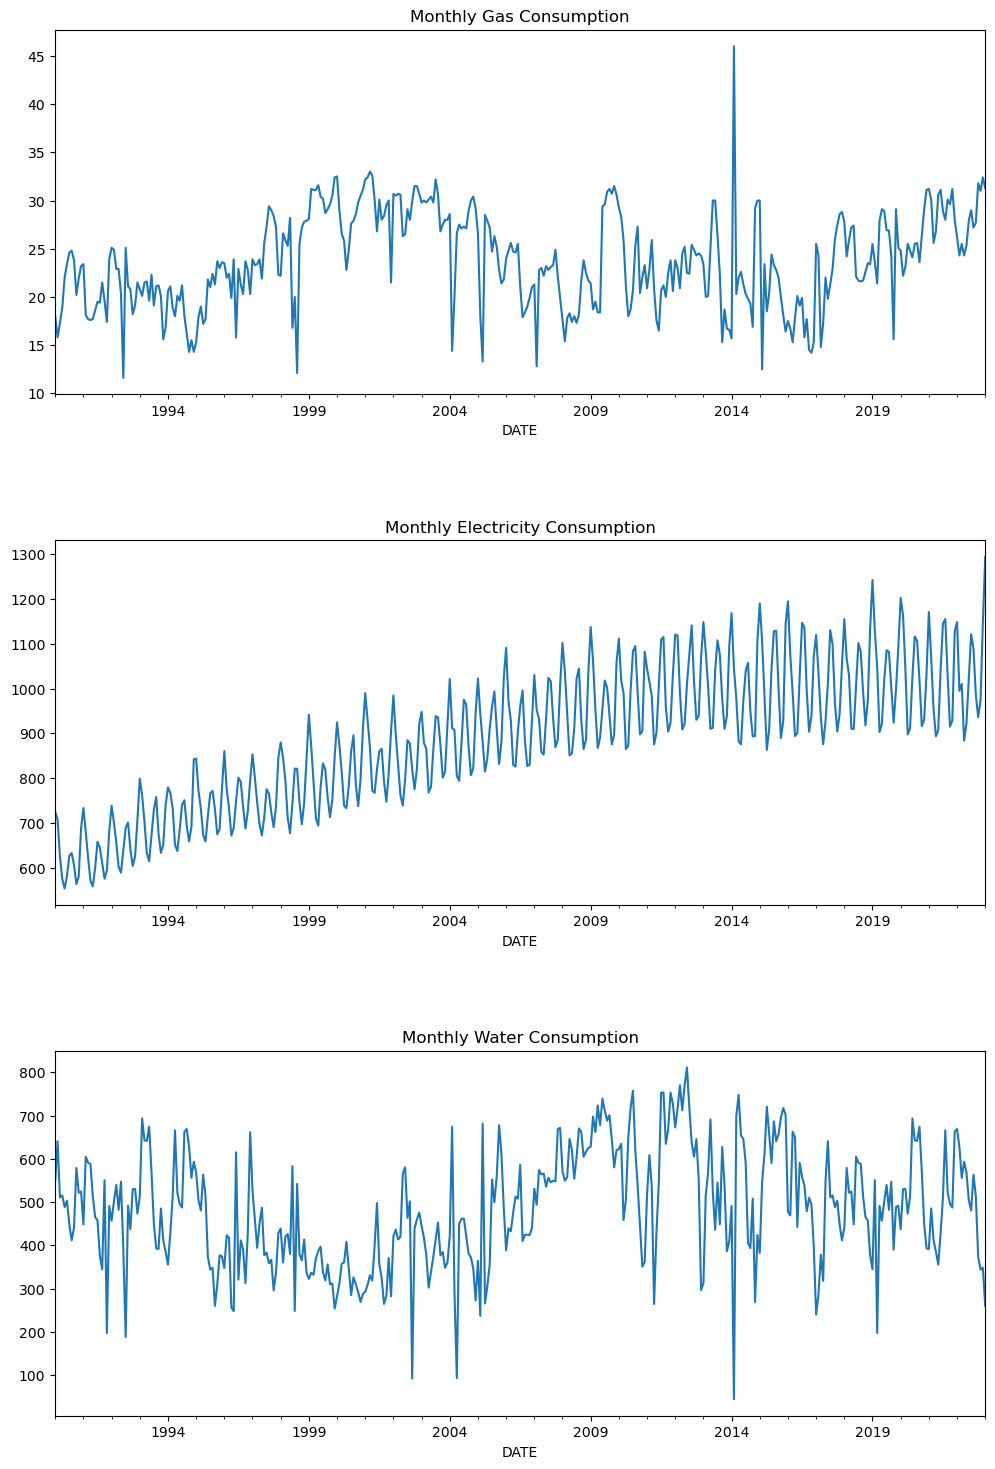

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot Gas Consumption
data['Gas Consumption (tons)'].plot(ax=axes[0])
axes[0].set_title('Monthly Gas Consumption')

# Plot Electricity Consumption
data['Electricity Consumption (MWh)'].plot(ax=axes[1])
axes[1].set_title('Monthly Electricity Consumption')

# Plot Water Consumption
data['Water Consumption (tons)'].plot(ax=axes[2])
axes[2].set_title('Monthly Water Consumption')

plt.subplots_adjust(hspace=0.4)
plt.show()


From the above plots to see the consumption over time, we can see that Gas consumption and Water consumption are not particularly stationary. On the other hand, Electricity consumption seems to have be increasing over time.
- Gas consumption has inconsistemt variance;
- Electricity consumption has an increasing variance;
- and Water consumption also has a inconsistent varaince, like Gas consumption

### Statistical test to check stationarity

To do a statistical test for stationarity, we can perfrom **Augmented Dickey-Fuller test (ADF)** and **Kwiatkowski-Phillips-Schmidt-Shin test (KPSS)**

The first test we will perfrom is the **AGas (Augmented Dickey Fuller) Test**


The ADF test statistic is a negative number which represents the rejection strength of the hypothesis at a level of strength; the more negative, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.
- Null Hypothesis: Unit root is absent; The series is non-stationary (p-value > 0.05)
- Alternate Hypothesis: Unit root is present; The series is stationary (p-value <= 0.05)

In [10]:
from statsmodels.tsa.stattools import adfuller

adfuller = adfuller(data['Gas Consumption (tons)'])
print('number of observations', adfuller[3], '\np-value:', adfuller[1])

number of observations 390 
p-value: 0.010810651707060586


In [11]:
aGastest = adfuller(data['Electricity Consumption (MWh)'])
print('number of observations', adftest[3], '\np-value:', adftest[1])

number of observations 381 
p-value: 0.1862180230033646


In [12]:
adftest = adfuller(data['Water Consumption (tons)'])
print('number of observations', adftest[3], '\np-value:', adftest[1])

number of observations 392 
p-value: 8.984549388337042e-05


From the above calculations we can see that the p-values for both Gas consumption and Water consumption are less than 0.05, with values of 0.01 and aproximately 0.00009 respectively. This means that we will reject the null hypothesis and the two features are not stationary. 

On the other hand, the p-value for Electricity consumption is greater than 0.05 with a value of 0.18. This means that we will not reject the null hypothesis and the feature is stationary.

Next, we will perfrom is the **Kwiatkowski-Phillips-Schmidt-Shin test (KPSS)**


The KPSS test is a test of trend stationarity and takes a contrarian approach to hypotheses
- Null Hypothesis: Unit root is present; The series is trend-stationary (p-value > 0.05)
- Alternate Hypothesis: Unit root is absent; The series is not trend-stationary (p-value <= 0.05)

In [13]:
from statsmodels.tsa.stattools import kpss
kpss = kpss(data['Gas Consumption (tons)'])

c:\Users\3mm3t\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [14]:
from statsmodels.tsa.stattools import kpss
kpss = kpss(data['Electricity Consumption (MWh)'])

c:\Users\3mm3t\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [15]:
from statsmodels.tsa.stattools import kpss
kpss = kpss(data['Water Consumption (tons)'])

c:\Users\3mm3t\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


From the above calculations we can see that the p-values for both Electricity consumption and Water consumption are said to be very small. This means that we will not reject the null hypothesis and they are trend-stationary

On the other hand, the p-value for Gas consumption is said to be very large. This means that we will reject the null hypothesis and the feature is mot trend-stationary.

After doing the 2 test, we can classify them into the types of stationarity. The types are
1. Strict Stationary - The mean, variance and covariance are not functions of time
2. Trend Stationary - The mean trend is deterministic. Once the trend is estimated and removed from the data, the residual series is a stationary stochastic process.
3. Difference Stationary - The mean trend is stochastic. Differencing the series D times yields a stationary stochastic process.

By looking at the 2 statistical tests that we have done, we can classify the different features as one of the cases below
- Case 1: Both tests conclude that the series is not stationary -> series is not stationary
- Case 2: Both tests conclude that the series is stationary -> series is stationary
- Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
- Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

Lets classify the types of stationary that the time series are
1. Gas consumption - not stationary and not trend-stationary -> [Case 1] series is not stationary
2. Electricity consumption - stationary and trend-stationary -> [Case 2] series is stationary
3. Water consumption - not stationary and trend-stationary -> [Case 3] trend stationary, remove the trend to make the series stationary

First slpit up the dataset into the individual components for ease of work

In [17]:
Gas = data['Gas Consumption (tons)']
Electricity = data['Electricity Consumption (MWh)']
Water = data['Water Consumption (tons)']


### Detrend by differencing

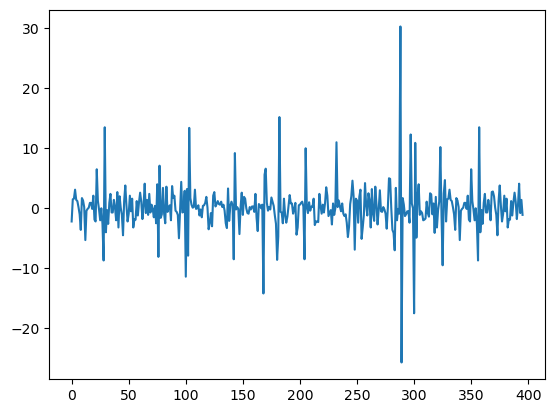

In [20]:
diff = list()
for i in range(1, len(Gas)):
    value = Gas[i] - Gas[i-1]
    diff.append(value)
plt.plot(diff)
plt.show()

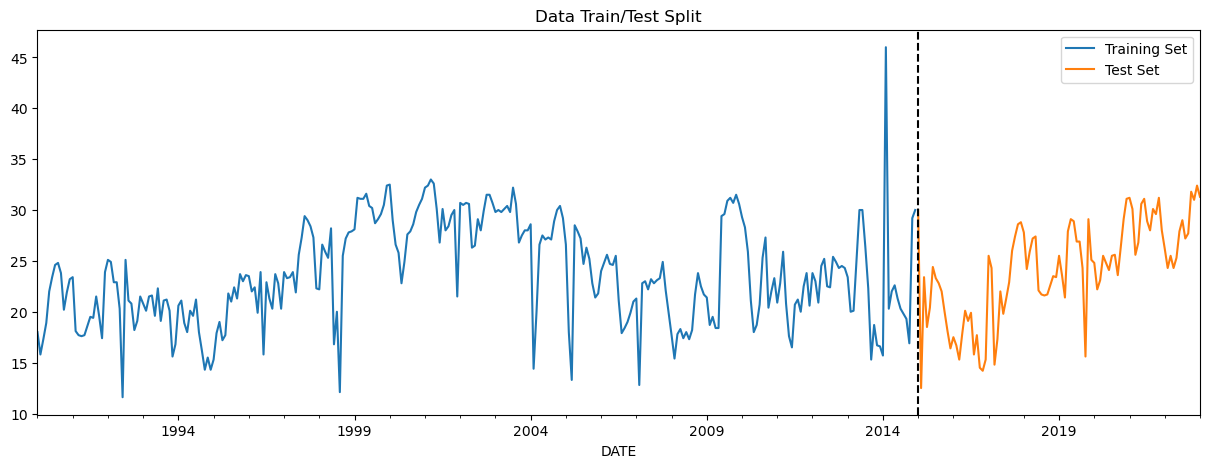

In [25]:
df = Gas

train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


In [ ]:
# Create lagged variables
data['lag1'] = data.shift(1)
data['lag2'] = data.shift(2)

# Create rolling window statistics
data['rolling_mean'] = data.rolling(window=3).mean()
data['rolling_std'] = data.rolling(window=3).std()

# Create seasonality features
data['month'] = data.index.month
data['quarter'] = data.index.quarter

In [37]:
df = Gas

def create_features(df):
    df = df.copy()

    df['lag1'] = df.values.shift(1)
    df['lag2'] = df.values.shift(2)

    df['rolling_mean'] = df.values.rolling(window=3).mean()
    df['rolling_std'] = df.values.rolling(window=3).std()

    df['month'] = df.index.dt.month
    df['quarter'] = df.index.dt.quarter

    return df

df = create_features(df)

AttributeError: 'numpy.ndarray' object has no attribute 'shift'

In [33]:
df = create_features(df)

KeyError: 'DATE'

In [31]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()

    df['lag1'] = df.shift(1)
    df['lag2'] = df.shift(2)

    df['rolling_mean'] = df.rolling(window=3).mean()
    df['rolling_std'] = df.rolling(window=3).std()

    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    return df

df = create_features(df)

DataError: No numeric types to aggregate

In [29]:
df.head()

DATE
1990-01-01    18.0
1990-02-01    15.8
1990-03-01    17.3
1990-04-01    18.9
1990-05-01    22.0
Name: Gas Consumption (tons), dtype: float64

In [28]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)